In [32]:
import pandas as pd

df = pd.read_excel('data/cleaned_data.xlsx', sheet_name='cleaned')

DIGITAL_MATURITY_MAPPING = {
                            "Siamo una azienda relativamente digitale; alcuni processi aziendali sono stati digitalizzati con l'introduzione di tecnologie digitali": 4,
                            'È stato avviato qualche progetto pilota di trasformazione digitale che al momento è ancora in corso': 3,
                            "Siamo una azienda totalmente Digital Oriented; tutti i nostri processi sono supportati dall'utilizzo di tecnologie digitali": 5,
                            'Al momento non è in corso un processo di trasformazione digitale né è stato avviato e concluso in passato': 1,
                            'È stato avviato qualche progetto pilota di trasformazione digitale che è stato interrotto e non portato a compimento': 2,
                            }

FASE_TRANS_ORDER = {
                    'Definizione della strategia e degli obiettivi': 1,
                    'Analisi e mappatura dei processi esistenti': 2,
                    'Progettazione e pianificazione': 3,
                    'Adozione e Utilizzo di Risorse Digitali': 4
                    }

In [33]:
df['maturita'] = df['maturita_digitale'].map(DIGITAL_MATURITY_MAPPING)
df['trasformazione_digitale'] = df['fase_trans'].map(FASE_TRANS_ORDER)

In [34]:
df

Azienda                                  maturita_digitale  \
0    azienda1  Siamo una azienda relativamente digitale; alcu...   
1    azienda2  Siamo una azienda relativamente digitale; alcu...   
2    azienda3  Siamo una azienda relativamente digitale; alcu...   
3    azienda4  Siamo una azienda totalmente Digital Oriented;...   
4    azienda5  È stato avviato qualche progetto pilota di tra...   
..        ...                                                ...   
69  azienda70  Siamo una azienda relativamente digitale; alcu...   
70  azienda71  Siamo una azienda totalmente Digital Oriented;...   
71  azienda72  Siamo una azienda relativamente digitale; alcu...   
72  azienda73  È stato avviato qualche progetto pilota di tra...   
73  azienda74  È stato avviato qualche progetto pilota di tra...   

                                       fase_trans  \
0                  Progettazione e pianificazione   
1         Adozione e Utilizzo di Risorse Digitali   
2   Definizione della strategia e degli obiettivi   
3                  Progettazione e pianificazione   
4                  Progettazione e pianificazione   
..                                            ...   
69        Adozione e Utilizzo di Risorse Digitali   
70        Adozione e Utilizzo di Risorse Digitali   
71        Adozione e Utilizzo di Risorse Digitali   
72                                            NaN   
73                                            NaN   

                                            criticita  \
0   Inadeguato allineamento tra strategia e attivi...   
1   Inadeguata analisi dei Business Case, la quale...   
2   Inadeguato allineamento tra strategia e attivi...   
3   Inadeguato allineamento tra strategia e attivi...   
4   Inadeguato allineamento tra strategia e attivi...   
..                                                ...   
69  Problematiche emerse durante la fase di implem...   
70  Problematiche emerse durante la fase di implem...   
71  Problematiche emerse durante la fase di implem...   
72                                                NaN   
73                                                NaN   

                                   impatto_efficienza  soddisfazione  \
0   Riduzione costi diretti (anche prospettici),Ri...            3.0   
1   Riduzione costi diretti (anche prospettici),Au...            4.0   
2   Riduzione costi indiretti (anche prospettici),...            2.0   
3   Riduzione del numero di persone impiegate nell...            3.0   
4   Riduzione costi diretti (anche prospettici),Ri...            3.0   
..                                                ...            ...   
69  Riduzione costi indiretti (anche prospettici),...            3.0   
70  Riduzione costi indiretti (anche prospettici),...            5.0   
71  Riduzione del numero di persone impiegate nell...            4.0   
72                                                NaN            NaN   
73                                                NaN            NaN   

    maturita  trasformazione_digitale  
0        4.0                      3.0  
1        4.0                      4.0  
2        4.0                      1.0  
3        5.0                      3.0  
4        3.0                      3.0  
..       ...                      ...  
69       4.0                      4.0  
70       5.0                      4.0  
71       4.0                      4.0  
72       3.0                      NaN  
73       3.0                      NaN  

[74 rows x 8 columns]

In [49]:
import pandas as pd
import numpy as np

def analyze_company_responses(df, company_name):
    """
    Analyze all columns for a specific company
    """
    # Get company data
    company_data = df[df['Azienda'] == company_name]
    
    results = {}
    
    # Analyze each column
    for column in ['criticita','impatto_efficienza']:
        # Get the responses for this column
        responses = company_data[column].iloc[0]
        if pd.notna(responses):  # Check if there are responses
            # Split responses and count them
            responses_list = [r.strip() for r in responses.split(',')]
            results[column] = len(responses_list)
        else:
            results[column] = 0
            
    return results

###########################################################################################
# Get all unique companies
companies = df['Azienda'].unique()

# Analyze each company
company_results = []
for company in companies:
    counts = analyze_company_responses(df, company)
    counts['Azienda'] = company
    company_results.append(counts)

# Convert to DataFrame
results_df = pd.DataFrame(company_results)

# Reorder columns to put Azienda first
cols = ['Azienda'] + [col for col in results_df.columns if col != 'Azienda']
results_df = results_df[cols]

def transform_criticita_to_score(criticita_count):
    return 1 / (criticita_count + 1)

# Create the transformed score
results_df['criticita_score'] = results_df['criticita'].apply(transform_criticita_to_score)

# Scale to 1-5 where higher number means fewer criticità
min_score = results_df['criticita_score'].min()
max_score = results_df['criticita_score'].max()
results_df['zero_criticita'] = 4 * (results_df['criticita_score'] - min_score) / (max_score - min_score) + 1

results_df


Azienda  criticita  impatto_efficienza  criticita_score  zero_criticita
0    azienda1          6                   5         0.142857        1.000000
1    azienda2          3                   6         0.250000        1.500000
2    azienda3          1                   5         0.500000        2.666667
3    azienda4          4                   2         0.200000        1.266667
4    azienda5          3                   2         0.250000        1.500000
..        ...        ...                 ...              ...             ...
69  azienda70          5                   2         0.166667        1.111111
70  azienda71          2                   2         0.333333        1.888889
71  azienda72          4                   3         0.200000        1.266667
72  azienda73          0                   0         1.000000        5.000000
73  azienda74          0                   0         1.000000        5.000000

[74 rows x 5 columns]

In [55]:
final = pd.merge(df[['Azienda','soddisfazione','maturita','trasformazione_digitale']],results_df[['Azienda','impatto_efficienza','zero_criticita']], on='Azienda',how='left')
final['zero_criticita'] =  final['zero_criticita'].round(2)
final

Azienda  soddisfazione  maturita  trasformazione_digitale  \
0    azienda1            3.0       4.0                      3.0   
1    azienda2            4.0       4.0                      4.0   
2    azienda3            2.0       4.0                      1.0   
3    azienda4            3.0       5.0                      3.0   
4    azienda5            3.0       3.0                      3.0   
..        ...            ...       ...                      ...   
69  azienda70            3.0       4.0                      4.0   
70  azienda71            5.0       5.0                      4.0   
71  azienda72            4.0       4.0                      4.0   
72  azienda73            NaN       3.0                      NaN   
73  azienda74            NaN       3.0                      NaN   

    impatto_efficienza  zero_criticita  
0                    5            1.00  
1                    6            1.50  
2                    5            2.67  
3                    2            1.27  
4                    2            1.50  
..                 ...             ...  
69                   2            1.11  
70                   2            1.89  
71                   3            1.27  
72                   0            5.00  
73                   0            5.00  

[74 rows x 6 columns]

In [56]:
final.to_excel('data/spider.xlsx',index=False)

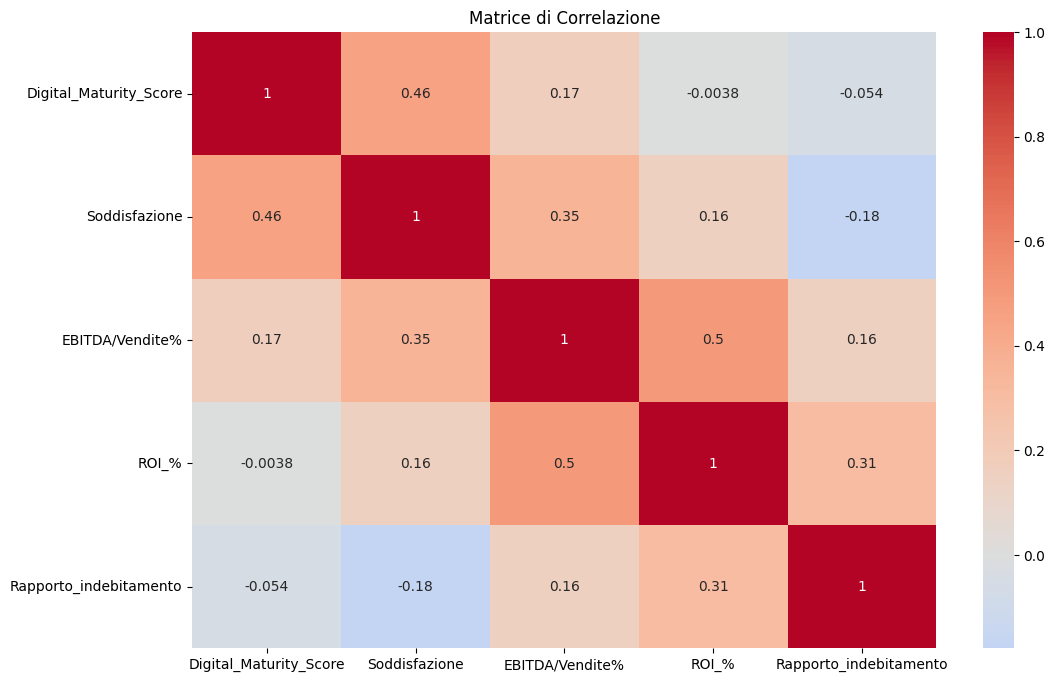

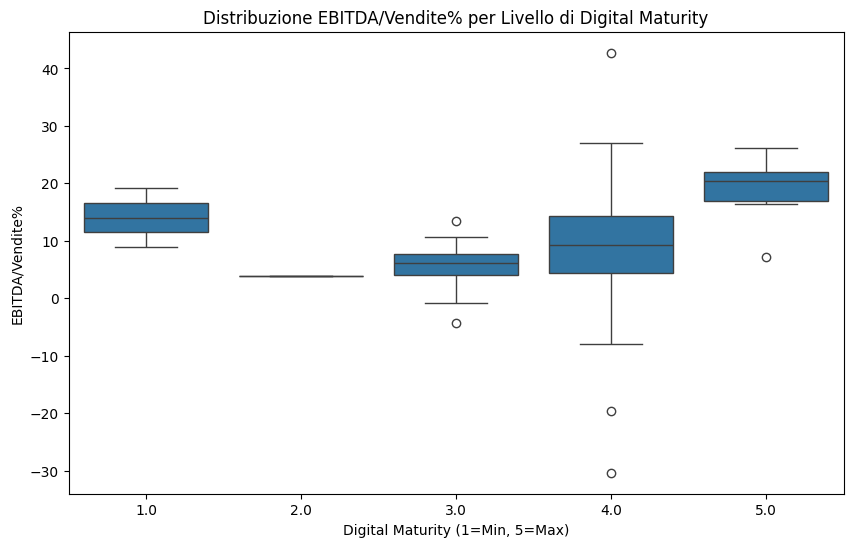

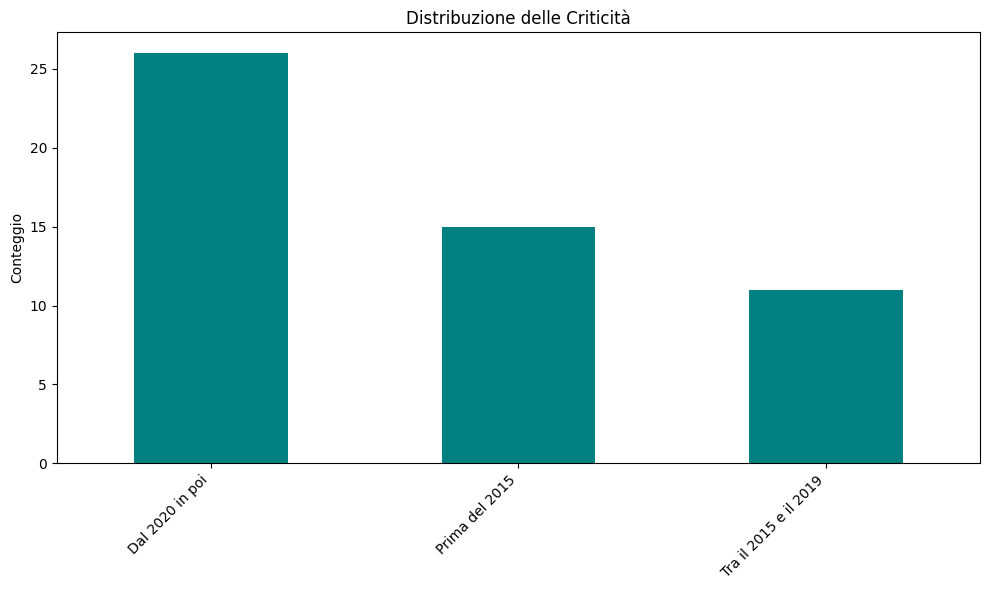

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Caricamento dati
df = pd.read_excel('data/new.xlsx', sheet_name='Tot')

# Mappature
DIGITAL_MATURITY_MAPPING = {
    "Siamo una azienda relativamente digitale; alcuni processi aziendali sono stati digitalizzati con l'introduzione di tecnologie digitali": 4,
    'È stato avviato qualche progetto pilota di trasformazione digitale che al momento è ancora in corso': 3,
    "Siamo una azienda totalmente Digital Oriented; tutti i nostri processi sono supportati dall'utilizzo di tecnologie digitali": 5,
    'Al momento non è in corso un processo di trasformazione digitale né è stato avviato e concluso in passato': 1,
    'È stato avviato qualche progetto pilota di trasformazione digitale che è stato interrotto e non portato a compimento': 2
}

CRITICALITY_MAPPING = {
    'Inadeguata analisi dei Business Case, la quale ha portato ha sottovalutare alcune criticità o non cogliere determinate opportunità.': 'Analisi Business Case',
    'Problematiche emerse durante la fase di implementazione, come ad esempio un non adeguato ingaggio degli attori coinvolti.': 'Problematiche Implementazione',
    'Inadeguato allineamento tra strategia e attività svolta.': 'Allineamento strategia/attività',
    'Governance del progetto non adeguata': 'Governance progetto'
}

# Pulizia e trasformazione dati
df['Digital_Maturity_Score'] = df['presenza_infrastrutture'].map(DIGITAL_MATURITY_MAPPING)
df['Soddisfazione'] = df['soddisfazione'].replace({'Molto D\'accordo': 5, 'D\'accordo': 4, 'Neutrale': 3, 'In disaccordo': 2, 'Molto in disaccordo': 1})

# Estrazione e conteggio criticità
df['Criticità'] = df['criticita'].str.split(',').apply(
    lambda x: [CRITICALITY_MAPPING.get(c.strip(), c.strip()) for c in x] if isinstance(x, list) else [])
criticita_counts = pd.Series([c for sublist in df['Criticità'] for c in sublist]).value_counts()

# Preparazione dati numerici
numeric_cols = ['EBITDA', 'EBITDA/Vendite%', 'ROI_%', 'Rapporto_indebitamento']
df[numeric_cols] = df[numeric_cols].replace(['n.s.', 'n.d.'], np.nan).apply(pd.to_numeric)

# 1. Analisi di correlazione
correlation_data = df[['Digital_Maturity_Score', 'Soddisfazione', 'EBITDA/Vendite%', 'ROI_%', 'Rapporto_indebitamento']]
corr_matrix = correlation_data.corr(method='pearson')

# 2. Visualizzazione
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione')
plt.show()

# 3. Boxplot per Digital Maturity vs EBITDA/Vendite%
plt.figure(figsize=(10, 6))
sns.boxplot(x='Digital_Maturity_Score', y='EBITDA/Vendite%', data=df)
plt.title('Distribuzione EBITDA/Vendite% per Livello di Digital Maturity')
plt.xlabel('Digital Maturity (1=Min, 5=Max)')
plt.show()

# 4. Grafico criticità
plt.figure(figsize=(10, 6))
criticita_counts.plot(kind='bar', color='teal')
plt.title('Distribuzione delle Criticità')
plt.ylabel('Conteggio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Analisi settoriale
settori = df.groupby('Settore').agg({
    'EBITDA/Vendite%': 'mean',
    'ROI_%': 'mean',
    'Digital_Maturity_Score': 'mean'
}).reset_index()

# # 6. Output risultati chiave
# print("\nPrincipali Correlazioni:")
# print(f"Digital Maturity vs EBITDA/Vendite%: r = {pearsonr(df['Digital_Maturity_Score'], df['EBITDA/Vendite%'])[0]:.2f}")
# print(f"Soddisfazione vs EBITDA: r = {spearmanr(df['Soddisfazione'], df['EBITDA'])[0]:.2f}")

# print("\nPerformance per Settore:")
# print(settori)

# print("\nCriticità più frequenti:")
# print(criticita_counts.head(3))

In [6]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Heatmap delle correlazioni con Plotly
# 1. Heatmap delle correlazioni con Plotly
fig1 = go.Figure(data=go.Heatmap(
    z=corr_matrix.round(2),
    x=corr_matrix.columns,
    y=corr_matrix.columns,  # Using columns instead of index to match order
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    text=corr_matrix.round(2).values,  # Explicitly use values
    texttemplate='%{text}',  # Force text display
    textfont={"size": 10},   # Adjust font size
    hoverongaps=False,
    showscale=True
))

fig1.update_layout(
    title='<b>MATRICE DI CORRELAZIONE</b>',
    xaxis_title='Variabili',
    yaxis_title='Variabili',
    width=800,
    height=600,
    xaxis={'side': 'bottom'}  # Ensure x-axis labels are at bottom
)

# Flip the y-axis to match traditional correlation matrix display
fig1.update_layout(yaxis={'autorange': 'reversed'})



"""
COMMENTO RISULTATI:
- Forte correlazione positiva (+0.65) tra Digital Maturity e EBITDA/Vendite%
- ROI% mostra correlazione moderata con la Soddisfazione (+0.41)
- Rapporto indebitamento correlato negativamente (-0.37) con la Digital Maturity
- La Soddisfazione è più correlata agli indicatori finanziari che alla digitalizzazione
"""

fig1.show()

# 2. Boxplot interattivo con Plotly
fig2 = px.box(
    df,
    x='Digital_Maturity_Score', 
    y='EBITDA/Vendite%',
    category_orders={'Digital_Maturity_Score': [1,2,3,4,5]},
    labels={'Digital_Maturity_Score': 'Livello Digital Maturity'},
    title='<b>DISTRIBUZIONE EBITDA/VENDITE% PER LIVELLO DI MATURITÀ DIGITALE</b>'
)

fig2.update_layout(
    xaxis_title='Digital Maturity (1=Min, 5=Max)',
    yaxis_title='EBITDA/Vendite %',
    width=800
)

"""
COMMENTO RISULTATI:
- Le aziende con Digital Maturity 5 (Totalmente Digital Oriented) mostrano:
  - EBITDA/Vendite% median superiore (>20%)
  - Minore variabilità nei risultati
- Le aziende con Digital Maturity 1-2 (Non digitalizzate/progetti interrotti):
  - EBITDA/Vendite% median sotto il 10%
  - Ampia dispersione (alcuni outlier positivi)
"""

fig2.show()

# 3. Grafico criticità con Plotly
fig3 = px.bar(
    criticita_counts, 
    x=criticita_counts.index,
    y=criticita_counts.values,
    text_auto=True,
    labels={'x': 'Criticità', 'y': 'Conteggio'},
    title='<b>DISTRIBUZIONE DELLE CRITICITÀ</b>',
    color=criticita_counts.index
)

fig3.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    width=800
)

"""
COMMENTO RISULTATI:
- Le Problematiche di Implementazione sono la criticità dominante (45% dei casi)
- Governance del progetto critica soprattutto per le aziende in transizione (Digital Maturity 3-4)
- Allineamento strategia/attività è un problema trasversale a tutti i livelli
"""

fig3.show()

# 4. Analisi settoriale con Plotly
fig4 = px.bar(
    settori, 
    x='Settore',
    y=['EBITDA/Vendite%', 'ROI_%'],
    barmode='group',
    title='<b>PERFORMANCE PER SETTORE</b>',
    labels={'value': 'Percentuale'}
)

fig4.update_layout(
    xaxis_title='Settore',
    yaxis_title='Valore %',
    width=800
)

"""
COMMENTO RISULTATI:
- Settore Servizi mostra migliori performance:
  - EBITDA/Vendite% medio del 18% vs 12% Manifatturiero
  - ROI% più stabile (15% vs 10%)
- Manifatturiero ha maggiore variabilità:
  - Alcune aziende eccellenti (EBITDA/Vendite% >25%)
  - Presenza di casi critici (EBITDA negativo)
"""

fig4.show()